In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [95]:
np.random.seed(0)
num_points = 500
X, y = datasets.make_circles(n_samples=num_points, random_state=123, noise=0.1, factor=0.2)

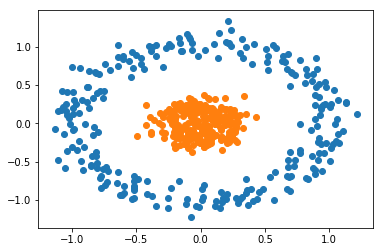

In [96]:
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])

In [97]:
model = Sequential()
model.add(Dense(units=4, input_shape=(2, ), activation='sigmoid')) # hidden layer (4 nodes)
model.add(Dense(units=1, activation='sigmoid')) # output layer (1 node), input_shape already defined
adam = Adam(learning_rate=0.01)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])

In [98]:
h = model.fit(x=X, y=y, verbose=1, batch_size=20, epochs=100, shuffle='true')

Epoch 1/100
500/500 [==============================] - 0s 311us/step - loss: 0.7476 - accuracy: 0.4800
Epoch 2/100
500/500 [==============================] - 0s 73us/step - loss: 0.6951 - accuracy: 0.3920
Epoch 3/100
500/500 [==============================] - 0s 76us/step - loss: 0.6940 - accuracy: 0.6060
Epoch 4/100
500/500 [==============================] - 0s 69us/step - loss: 0.6929 - accuracy: 0.6800
Epoch 5/100
500/500 [==============================] - 0s 70us/step - loss: 0.6920 - accuracy: 0.6160
Epoch 6/100
500/500 [==============================] - 0s 66us/step - loss: 0.6912 - accuracy: 0.3480
Epoch 7/100
500/500 [==============================] - 0s 84us/step - loss: 0.6898 - accuracy: 0.6140
Epoch 8/100
500/500 [==============================] - 0s 96us/step - loss: 0.6881 - accuracy: 0.5740
Epoch 9/100
500/500 [==============================] - 0s 63us/step - loss: 0.6860 - accuracy: 0.7360
Epoch 10/100
500/500 [==============================] - 0s 66us/step - loss: 0.68

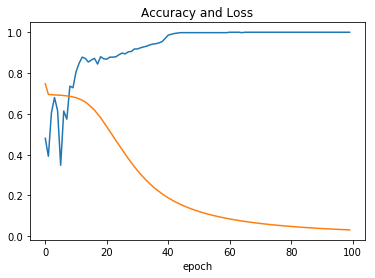

In [99]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.title('Accuracy and Loss')
plt.legend=(['Accuracy', 'Loss'])

In [100]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()

    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

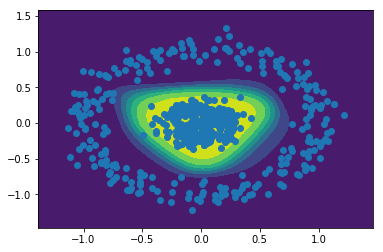

In [101]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:num_points, 0], X[:num_points, 1])
plt.scatter(X[num_points:, 0], X[num_points:, 1])

Prediction is: 0.4540255


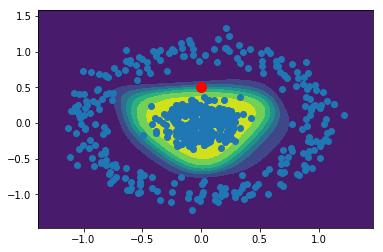

In [104]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:num_points, 0], X[:num_points, 1])
plt.scatter(X[num_points:, 0], X[num_points:, 1])

x = 0.
y = 0.5
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color='red')
print "Prediction is:", prediction[0][0] 